# Dimension Reduction

- dimensionality reduction reduces the number of variables
- allows data mining algorithm to operate efficiently

Several dimension reduction approaches
- remove or combine categories
- converting categorical variables into numerical variables
- employing automated reduction technique such as PCA


In [1]:
import matplotlib.pylab as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

from pandas_util import load_boston_housing

In [2]:
df = load_boston_housing()
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,cat_medv
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,10.30,19.2,0
325,0.19186,0.0,7.38,0,0.493,6.431,14.7,5.4159,5,287,19.6,5.08,24.6,0
386,24.39380,0.0,18.10,0,0.700,4.652,100.0,1.4672,24,666,20.2,28.28,10.5,0
196,0.04011,80.0,1.52,0,0.404,7.287,34.1,7.3090,2,329,12.6,4.08,33.3,1
211,0.37578,0.0,10.59,1,0.489,5.404,88.6,3.6650,4,277,18.6,23.98,19.3,0


In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,cat_medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crim      506 non-null    float64
 1   zn        506 non-null    float64
 2   indus     506 non-null    float64
 3   chas      506 non-null    int64  
 4   nox       506 non-null    float64
 5   rm        506 non-null    float64
 6   age       506 non-null    float64
 7   dis       506 non-null    float64
 8   rad       506 non-null    int64  
 9   tax       506 non-null    int64  
 10  ptratio   506 non-null    float64
 11  lstat     506 non-null    float64
 12  medv      506 non-null    float64
 13  cat_medv  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [5]:
# To view CRIM: per capita crime rate by town
df.describe().crim

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

In [6]:
print("Number of missing values:", df.crim.isnull().sum())

Number of missing values: 0


In [7]:
# To understand the relationship between two or more numerica variables, we can plot the complete matrix of correlations.
df.corr().round(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,cat_medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


Text(0, 0.5, 'Number of neighborhood')

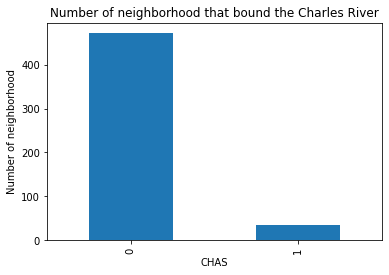

In [8]:
# Aggregation and Pivot Tables

# Number of neighborhoods that bound the Charles River, vs those that do not.
# Majority of the neighborhood do not bound the Charles River.
df.chas.value_counts().plot.bar()
plt.title("Number of neighborhood that bound the Charles River")
plt.xlabel("CHAS")
plt.ylabel("Number of neighborhood")

In [9]:
# help(pd.cut)
# use pd.cut to change a list of continuous variables to categorical variables.
pd.cut([1, 2, 1, 3, 4, 4, 5, 6], 3, labels=False)

array([0, 0, 0, 1, 1, 1, 2, 2])

In [10]:
# Average MEDV by CHAS and RM
# By default, the method creates a categorical variable range, e.g. (6,7].
# The argument `labels=False` determines integer instead, e.g. 6
#
# Info
# rm: average number of rooms per dwelling
# chas: Charles River dummy variables (= 1 if tract bounds river; 0 otherwise).
n_bins = range(10)
df["rm_bin"] = pd.cut(df.rm, n_bins, labels=False)

In [11]:
# Group by the number of rooms bins, then by Charles River dummy variables.
df.groupby(["rm_bin", "chas"]).medv.mean()

rm_bin  chas
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: medv, dtype: float64

In [12]:
# Pivot tables
pd.pivot_table(
    df, values="medv", index=["rm_bin"], columns=["chas"], aggfunc=np.mean, margins=True
)

chas,0,1,All
rm_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


In [13]:
# help(pd.crosstab)
pd.crosstab(
    pd.Series([1, 2, 3], index=["a", "b", "c"]),
    pd.Series([4, 5, 6], index=["a", "b", "d"]),
    margins=True,
)

col_0,4,5,All
row_0,,,
1,1,0,1
2,0,1,1
All,1,1,2


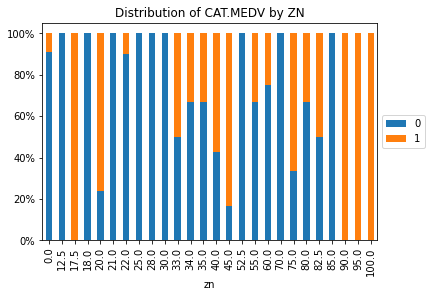

In [14]:
# Use method crosstab to create a cross-tabulation of two variables.
tbl = pd.crosstab(df.cat_medv, df.zn)

# Convert number to ratios.
prop_tbl = tbl / tbl.sum()
prop_tbl.round(2)

# Plot the ratios in a stacked bar chart.
ax = prop_tbl.T.plot.bar(stacked=True)

# UserWarning: FixedFormatter should only be used together with FixedLocator
# ax.set_yticklabels([":,.0%".format(x) for x in ax.get_yticks()])
label_format = "{:,.0%}"  # Display as percent, so 0.1 becomes 10%
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels([label_format.format(x) for x in ticks_loc])


plt.title("Distribution of CAT.MEDV by ZN")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

## Reducing the number of categories in categorical variables

In [15]:
# rating: The consumer rating is a rating of cereal "healthiness" for consumer information (not a rating by customer).
cereals_df = pd.read_csv("./datasets/dmba/Cereals.csv")
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [16]:
"Average calories:", cereals_df.calories.mean()

('Average calories:', 106.88311688311688)

In [17]:
"Average consumer rating:", cereals_df.rating.mean()

('Average consumer rating:', 42.66570498701299)

In [18]:
# The estimated covariance matrix between the two variables is:
cereals_df[["calories", "rating"]].cov()

,calories,rating
calories,379.630895,-188.681562
rating,-188.681562,197.326321


In [19]:
# The two variables are strongly correlated with negative correlation of -0.689
cereals_df[["calories", "rating"]].corr()

,calories,rating
calories,1.000000,-0.689376
rating,-0.689376,1.000000


In [20]:
pca = PCA(n_components=2)
pca.fit(cereals_df[["calories", "rating"]])
pca_summary = pd.DataFrame(
    {
        "Standard deviation": np.sqrt(pca.explained_variance_),
        "Proportion of variance": pca.explained_variance_ratio_,
        "Cumulative proportion": np.cumsum(pca.explained_variance_ratio_),
    }
)

pca_summary = pca_summary.T
pca_summary.columns = ["PC1", "PC2"]
pca_summary.round(4)

,PC1,PC2
Standard deviation,22.3165,8.8844
Proportion of variance,0.8632,0.1368
Cumulative proportion,0.8632,1.0000


In [21]:
pca.components_

array([[-0.84705348,  0.53150766],
       [ 0.53150766,  0.84705348]])

<AxesSubplot:>

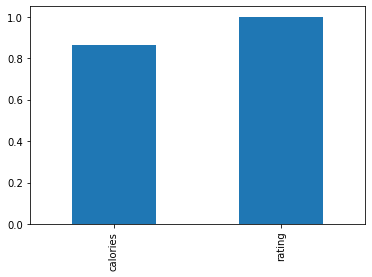

In [22]:
# Feature 'calories' contributes to
pd.Series(
    pca.explained_variance_ratio_, index=["calories", "rating"]
).cumsum().plot.bar()

In [23]:
pca_components_df = pd.DataFrame(
    pca.components_.T, columns=["PC1", "PC2"], index=["calories", "rating"]
)
pca_components_df

,PC1,PC2
calories,-0.847053,0.531508
rating,0.531508,0.847053


In [24]:
# calories principal component = -0.847053 * PC1 + 0.531508 * PC2

In [25]:
scores = pd.DataFrame(
    pca.transform(cereals_df[["calories", "rating"]]), columns=["PC1", "PC2"]
)
scores.head()

,PC1,PC2
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686


<AxesSubplot:xlabel='calories', ylabel='rating'>

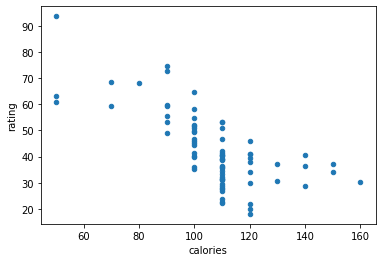

In [26]:
cereals_df.plot.scatter(x="calories", y="rating")

In [27]:
pca.components_, pca.explained_variance_

(array([[-0.84705348,  0.53150766],
        [ 0.53150766,  0.84705348]]),
 array([498.02447768,  78.93273879]))

In [28]:
# PCA output using all 13 numerical variables in the breakfast cereals dataset. THe table shows results for the first five principal components.
transformer = preprocessing.StandardScaler()

pca = PCA()
# Skip the first 3 columns, drop rows that contains NA fields
# pca.fit(preprocessing.scale(cereals_df.iloc[:, 3:].dropna(axis=0)))
pca.fit(transformer.fit_transform(cereals_df.iloc[:, 3:].dropna(axis=0)))
pca_summary_df = pd.DataFrame(
    {
        "Standard deviation": np.sqrt(pca.explained_variance_),
        "Proportion of variance": pca.explained_variance_ratio_,
        "Cumulative proportion": np.cumsum(pca.explained_variance_ratio_),
    }
)
pca_summary_df = pca_summary_df.T
pca_summary_df.columns = [f"PC{i+1}" for i in range(len(pca_summary_df.columns))]
pca_summary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,1.9192,1.7864,1.3912,1.0166,1.0015,0.8555,0.8251,0.6496,0.5658,0.3051,0.2537,0.1399,0.0
Proportion of variance,0.2795,0.2422,0.1469,0.0784,0.0761,0.0555,0.0517,0.0320,0.0243,0.0071,0.0049,0.0015,0.0
Cumulative proportion,0.2795,0.5217,0.6685,0.7470,0.8231,0.8786,0.9303,0.9623,0.9866,0.9936,0.9985,1.0000,1.0


In [29]:
pca_components_df = pd.DataFrame(
    pca.components_.T,
    columns=pca_summary_df.columns,
    index=cereals_df.iloc[:, 3:].columns,
)
pca_components_df.iloc[:, :5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.299542,-0.393148,0.114857,-0.204359,0.203899
protein,0.307356,-0.165323,0.277282,-0.300743,0.319749
fat,-0.039915,-0.345724,-0.204890,-0.186833,0.586893
sodium,-0.183397,-0.137221,0.389431,-0.120337,-0.338364
fiber,0.453490,-0.179812,0.069766,-0.039174,-0.255119
carbo,-0.192449,0.149448,0.562452,-0.087835,0.182743
sugars,-0.228068,-0.351434,-0.355405,0.022707,-0.314872
potass,0.401964,-0.300544,0.067620,-0.090878,-0.148360
vitamins,-0.115980,-0.172909,0.387859,0.604111,-0.049287
shelf,0.171263,-0.265050,-0.001531,0.638879,0.329101


In [30]:
# Preprocessing scale vs StandardScaler
# https://stackoverflow.com/questions/46257627/scikit-learn-preprocessing-scale-vs-preprocessing-standardscalar
preprocessing.scale([10, 1, 2, 3, 5])

array([ 1.81962183, -1.00392929, -0.69020139, -0.37647348,  0.25098232])

In [31]:
transformer = preprocessing.StandardScaler()
transformer.fit_transform(np.array([10, 1, 2, 3, 5]).reshape(-1, 1))

array([[ 1.81962183],
       [-1.00392929],
       [-0.69020139],
       [-0.37647348],
       [ 0.25098232]])

# Principal components of non-normalized wine data

In [32]:
wine_df = pd.read_csv("./datasets/dmba/Wine.csv")
wine_df = wine_df.drop(columns="Type")
wine_df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
15,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310
147,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625
44,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
82,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630


In [33]:
pca = PCA()
pca.fit(wine_df.dropna(axis=0))

PCA()

In [34]:
pca_summary_df = pd.DataFrame(
    {
        "Standard Deviation": np.sqrt(pca.explained_variance_),
        "Proportion of variance": pca.explained_variance_ratio_,
        "Cumulative Proportion": np.cumsum(pca.explained_variance_ratio_),
    }
)
pca_summary_df = pca_summary_df.T
pca_summary_df.columns = ["PC" + str(i + 1) for i in range(len(pca_summary_df.columns))]
pca_summary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard Deviation,314.9632,13.1353,3.0722,2.2341,1.1085,0.9171,0.5282,0.3891,0.3348,0.2678,0.1938,0.1452,0.0906
Proportion of variance,0.9981,0.0017,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative Proportion,0.9981,0.9998,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [35]:
pca_components_df = pd.DataFrame(
    pca.components_.T, columns=pca_summary_df.columns, index=wine_df.columns
)
pca_components_df.iloc[:, :5]

,PC1,PC2,PC3,PC4,PC5
Alcohol,0.001659,0.001203,-0.016874,-0.141447,0.020337
Malic_Acid,-0.000681,0.002155,-0.122003,-0.160390,-0.612883
Ash,0.000195,0.004594,-0.051987,0.009773,0.020176
Ash_Alcalinity,-0.004671,0.026450,-0.938593,0.330965,0.064352
Magnesium,0.017868,0.999344,0.029780,0.005394,-0.006149
Total_Phenols,0.000990,0.000878,0.040485,0.074585,0.315245
Flavanoids,0.001567,-0.000052,0.085443,0.169087,0.524761
Nonflavanoid_Phenols,-0.000123,-0.001354,-0.013511,-0.010806,-0.029648
Proanthocyanins,0.000601,0.005004,0.024659,0.050121,0.251183
Color_Intensity,0.002327,0.015100,-0.291398,-0.878894,0.331747
